# Prosper Loan Analysis
Tianyue Niu

## Exploratory Analysis & Visualization

#### Introduction   

Prosper Loans is a marketplace lending company that provides unsecured personal loans of up to $40,000 for any purpose: Debt consolidation, home renovations, major life events, or large purchases.  

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate),current loan status, borrower income, and many others.

The project intends to explore the factors that affect loan status through visualization techniques. Some of the variables that I am interested are DebtToIncomeRatio, IncomeRange, LoanOrriginalAmount, AvailableBankcardCredit, IsBorrowerHomeowner, EmploymentStatus, EmploymentStatusDuration, and Credit Score.

In [132]:
#import all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [133]:
df = pd.read_csv('prosperLoanData.csv')

#### Basic Data Wrangling

In [134]:
#We will limit our dataset to the variables of interest to make analysis faster
new = df[['ListingKey', 'ListingNumber', 'ListingCreationDate','LoanStatus', 
          'LoanOriginalAmount', 'MonthlyLoanPayment', 'IncomeRange',
          'DebtToIncomeRatio', 'AvailableBankcardCredit', 'IsBorrowerHomeowner', 
          'EmploymentStatus','EmploymentStatusDuration', 'CreditScoreRangeUpper', 
          'CreditScoreRangeLower']]

In [135]:
print(new.info())
new.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
ListingKey                  113937 non-null object
ListingNumber               113937 non-null int64
ListingCreationDate         113937 non-null object
LoanStatus                  113937 non-null object
LoanOriginalAmount          113937 non-null int64
MonthlyLoanPayment          113937 non-null float64
IncomeRange                 113937 non-null object
DebtToIncomeRatio           105383 non-null float64
AvailableBankcardCredit     106393 non-null float64
IsBorrowerHomeowner         113937 non-null bool
EmploymentStatus            111682 non-null object
EmploymentStatusDuration    106312 non-null float64
CreditScoreRangeUpper       113346 non-null float64
CreditScoreRangeLower       113346 non-null float64
dtypes: bool(1), float64(6), int64(2), object(5)
memory usage: 11.4+ MB
None


,ListingKey,ListingNumber,ListingCreationDate,LoanStatus,LoanOriginalAmount,MonthlyLoanPayment,IncomeRange,DebtToIncomeRatio,AvailableBankcardCredit,IsBorrowerHomeowner,EmploymentStatus,EmploymentStatusDuration,CreditScoreRangeUpper,CreditScoreRangeLower
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,Completed,9425,330.43,"$25,000-49,999",0.17,1500.0,True,Self-employed,2.0,659.0,640.0
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,Current,10000,318.93,"$50,000-74,999",0.18,10266.0,False,Employed,44.0,699.0,680.0


In [136]:
#let's drop all missing values to make our analysis easier
new = new.dropna()

### Univariate Explorations

##### Explore our target variable loan status

In [137]:
#Change LoanStatus to a categorical variable
new.LoanStatus = new.LoanStatus.astype('category')

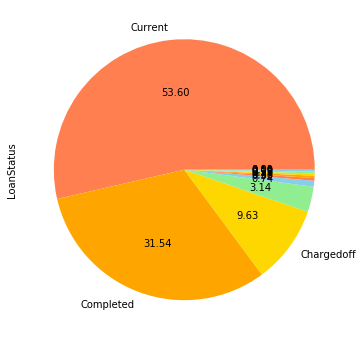

In [138]:
#show counts for each category of LoanStatus
labels=['Current', 'Completed', 'Chargedoff']+[" "]*9
plt.figure(figsize=(6,6))
new.LoanStatus.value_counts().plot(kind='pie', autopct='%.2f',
                                   colors=['coral','orange','gold','lightgreen', 'skyblue'],
                                   labels=labels);

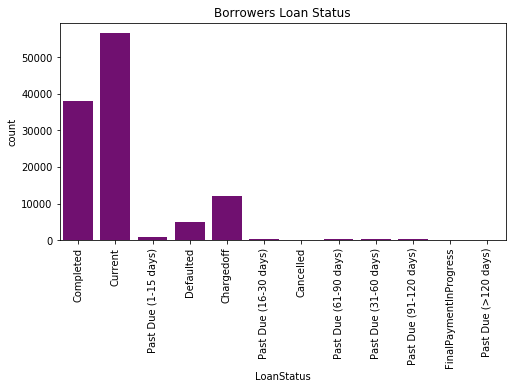

In [139]:
plt.figure(figsize=(8,4))
sb.countplot(data=df, x='LoanStatus', color='purple')
plt.xticks(rotation=90)
plt.title('Borrowers Loan Status');

In [140]:
new[['CreditScoreRangeUpper', 'CreditScoreRangeLower']].head(5)

,CreditScoreRangeUpper,CreditScoreRangeLower
0,659.0,640.0
1,699.0,680.0
3,819.0,800.0
4,699.0,680.0
5,759.0,740.0


We see from the above graph and the summarized value_counts() that most (83.08%) of the loans present in the dataset are either current or completed. 

##### Debt To Income Ratio

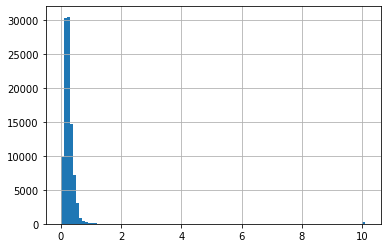

In [141]:
bins=np.arange(0, 10.2, 0.1)
new.DebtToIncomeRatio.hist(bins=bins)

The above graph clearly contains outliers that requires further examination.

In [142]:
print("Maximum debt:income ratio is:", new.DebtToIncomeRatio.max())
print("Mean debt:income ratio is:", new.DebtToIncomeRatio.mean())
print("Minimum debt:income ratio is:", new.DebtToIncomeRatio.min())

Maximum debt:income ratio is: 10.01
Mean debt:income ratio is: 0.27603119955867117
Minimum debt:income ratio is: 0.0


In [143]:
numerator = new.query('DebtToIncomeRatio>1').DebtToIncomeRatio.count()
denominator = new.DebtToIncomeRatio.count()
p = numerator/denominator
print ("Proportion of debt:income ratio that is higher than 1 is:", p)

Proportion of debt:income ratio that is higher than 1 is: 0.006885560754346894


In [144]:
new.query('DebtToIncomeRatio > 1')['LoanStatus'].value_counts()

Completed                 281
Chargedoff                155
Current                   152
Defaulted                  70
Past Due (61-90 days)       6
Past Due (91-120 days)      3
Past Due (16-30 days)       3
Past Due (31-60 days)       2
Past Due (1-15 days)        2
Past Due (>120 days)        0
FinalPaymentInProgress      0
Cancelled                   0
Name: LoanStatus, dtype: int64

In [145]:
new.query('DebtToIncomeRatio > 1 and IncomeRange == "$75,000-99,999"')

,ListingKey,ListingNumber,ListingCreationDate,LoanStatus,LoanOriginalAmount,MonthlyLoanPayment,IncomeRange,DebtToIncomeRatio,AvailableBankcardCredit,IsBorrowerHomeowner,EmploymentStatus,EmploymentStatusDuration,CreditScoreRangeUpper,CreditScoreRangeLower
39782,3B90339041409218657FC82,144511,2007-05-30 10:27:42.637000000,Chargedoff,12000,455.56,"$75,000-99,999",1.32,1072.0,True,Full-time,28.0,619.0,600.0
44952,4D583556039791613C0A7DC,627690,2012-08-22 15:21:34.930000000,Completed,9000,328.27,"$75,000-99,999",1.16,8643.0,True,Employed,28.0,779.0,760.0
80723,E8B9354063665214133AEE4,561978,2012-02-23 09:13:01.197000000,Chargedoff,2000,84.89,"$75,000-99,999",2.55,16883.0,True,Employed,198.0,659.0,640.0


Although we don't know how exactly is debt to income ratio caculated, we can safely assume that it's something similar to monthly debt / monthly loan. Therefore, some of the entires might be incorrect (e.g. the three entries with income range from 75000-99999 that have debt:income ratio that is > than 1, even though their monthly payment are all under $500). Since this project's focus is not on data cleaning, we will take a note of this problem and leave it for now. I will come back to change it in the following analysis if needed.

To examine if we need to transform/rescale the data, let's see debt:income ratio's distribution with values under 1 to get a clearer picture.

Text(0.5, 1.0, 'Debt to Income Ratio (under 1) Distribution')

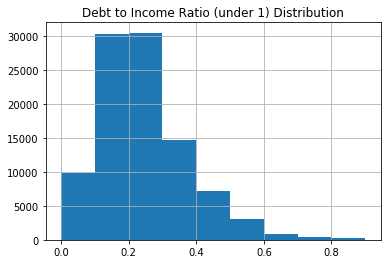

In [146]:
bins=np.arange(0, 1, 0.1)
new.DebtToIncomeRatio.hist(bins=bins)
plt.title('Debt to Income Ratio (under 1) Distribution')

It is slightly right skewed, but it's not a log distribution so we will leave it be.

##### Loan Original Amount 

Text(0.5, 1.0, 'Loan Original Amount Distribution')

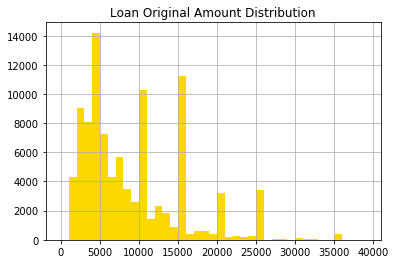

In [198]:
bins=np.arange(0, 40000, 1000)
new.LoanOriginalAmount.hist(color='gold', bins=bins)
plt.title('Loan Original Amount Distribution')

From the above graph, we see that majority of the loans had an original amount of less than 10000. However, an interesting pattern is that we see spike at each 5000, which might be because people are used to borrowing money in units of $50000.

##### Income Range

In [147]:
new.IncomeRange = new.IncomeRange.astype('category') #change income range to category

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

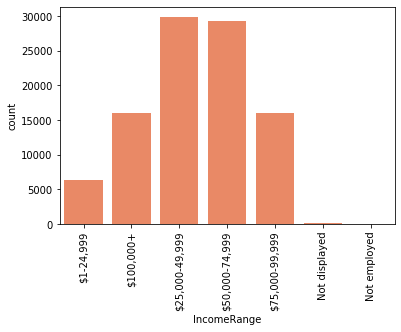

In [148]:
sb.countplot(data=new, x='IncomeRange', color='coral')
plt.xticks(rotation=90) 

From the above graph it looks like income range has a normal distribution.

##### Available Bankcard Credit

In [149]:
new.AvailableBankcardCredit.max()

572427.0

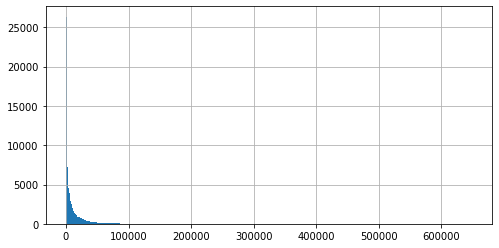

In [150]:
bins=np.arange(0, 650000, 1000)
plt.figure(figsize=(8,4))
new.AvailableBankcardCredit.hist(bins=bins)

In [151]:
#the above graph is clearly influenced by outliers, let's zoom in to see a clearer picture

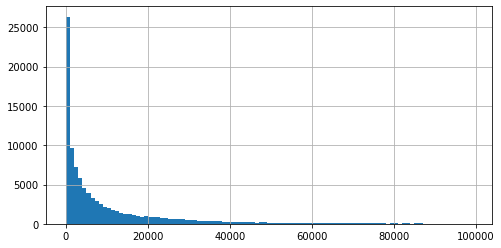

In [152]:
bins=np.arange(0, 100000, 1000)
plt.figure(figsize=(8,4))
new.AvailableBankcardCredit.hist(bins=bins)

The data is clearly right skewed. Let's rescale and transform the data to get more information.

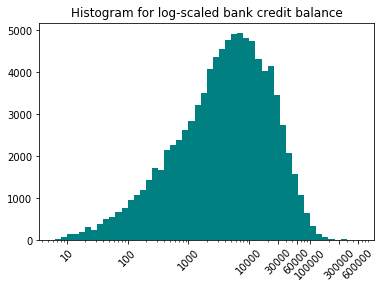

In [153]:
bin_edges = 10 ** np.arange(0.8, np.log10(new.AvailableBankcardCredit.max())+0.1, 0.1)
plt.hist(new.AvailableBankcardCredit, bins = bin_edges, color='teal')
plt.xscale('log')
tick_locs = [10, 100, 1000, 10000, 30000, 60000, 100000, 300000, 600000]
plt.xticks(tick_locs, tick_locs, rotation=45)
plt.title('Histogram for log-scaled bank credit balance');

Now, the above graph is much more interpretable. We see that the most frequent bankcard credit balance is around $10000; most of our users had credit balance in between 1000 and 30000.

##### Is Borrower a Homeowner?

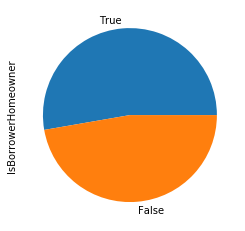

In [154]:
new.IsBorrowerHomeowner.value_counts().plot(kind="pie")

In [155]:
p_borrower_is_homeowner = 51613 / (51613+46273)
print("Percent of homeowner is:", p_borrower_is_homeowner)

Percent of homeowner is: 0.5272766279141041


##### Employment Status & Duration

In [156]:
new.EmploymentStatus = new.EmploymentStatus.astype('category') 
#change type to category

In [157]:
new.EmploymentStatus.value_counts()

Employed         65895
Full-time        25580
Other             3520
Self-employed     1092
Part-time          969
Retired            735
Not employed        95
Name: EmploymentStatus, dtype: int64

Text(0.5, 1.0, 'Histogram for Employment Status Duration')

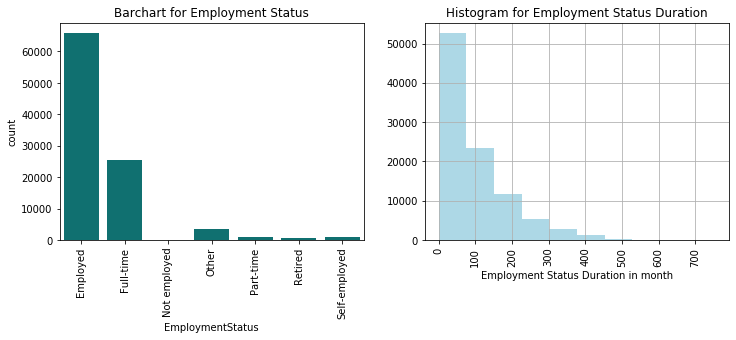

In [158]:
plt.figure(figsize=(12,4))
ax1=plt.subplot(1,2,1)
ax1=sb.countplot(data=new, x='EmploymentStatus', color='teal')
plt.xticks(rotation=90)
plt.title('Barchart for Employment Status');
ax2=plt.subplot(1,2,2)
ax2=new.EmploymentStatusDuration.hist(color='lightblue')
plt.xticks(rotation=90)
plt.xlabel('Employment Status Duration in month')
plt.title('Histogram for Employment Status Duration')

From the left graph we see that over 60% of borrowers in our data are either employed or self-employed. From the right graph we see that employment duration in month is  right skewed, with most users having an employment status duration of less than 200 months.

##### Credit Score

In [159]:
#take the mean of upper and lower credit score for easier analysis
new['CreditScore'] = (new.CreditScoreRangeUpper + new.CreditScoreRangeLower)/2

In [160]:
#Get a general description for CreditScore
print(new.CreditScore.describe())

count    97886.000000
mean       699.869818
std         56.744964
min        529.500000
25%        669.500000
50%        689.500000
75%        729.500000
max        889.500000
Name: CreditScore, dtype: float64


### Bivariate Explorations

Given the above univariate analysis, some of the bivariate relationship that I am interested in exploring are:
- debt to income ratio and loan status
- credit score and loan status
- home owner and loan status

However before starting to explore bivariate relationship, I wish to create a new column that combines the categories of loan status so that all past due are combined into one.

In [161]:
dici = {'Current': 'Current', 'Completed': 'Completed','Chargedoff': 'Chargedoff',
        'Defaulted': 'Defaulted', 'Past Due (1-15 days)': 'Past Due',
        'Past Due (16-30 days)': 'Past Due', 'Past Due (31-60 days)': 'Past Due',
        'Past Due (61-90 days)': 'Past Due', 'Past Due (91-120 days)': 'Past Due', 
        'Past Due (>120 days)':'Past Due', 'FinalPaymentInProgress':'FinalPaymentInProgress',
        'Cancelled':'Cancelled'}

In [162]:
new['LoanStatusNew'] = new.LoanStatus.map(dici).astype("category", inplace = True)

In [163]:
new.LoanStatusNew.value_counts() #check if the categories were set up properly

Current                   52468
Completed                 30875
Chargedoff                 9422
Defaulted                  3074
Past Due                   1857
FinalPaymentInProgress      189
Cancelled                     1
Name: LoanStatusNew, dtype: int64

##### Debt to income ratio and loan status

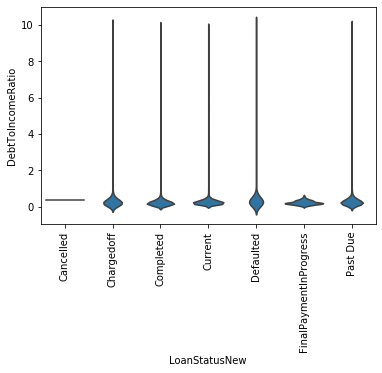

In [164]:
#draw a violin plot to see the relationship between these two variables:
base_color = sb.color_palette()[0]
sb.violinplot(data = new, x = 'LoanStatusNew', y = 'DebtToIncomeRatio', 
              color = base_color, inner = None)
plt.xticks(rotation=90);

We can't see much from the above graph due to influence of outliers, let's try to limit our data to rows with debt to income ratio that is lower than 1 (which is > 99 percent of our data)

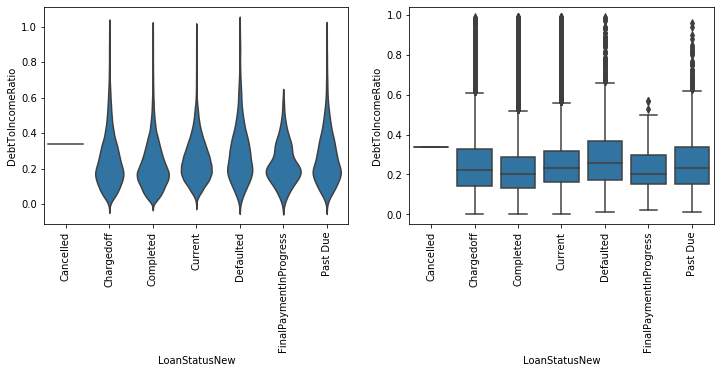

In [165]:
#draw a violin plot and a box plot to see the relationship between these two variables:
plt.figure(figsize=(12,4))
new = new.query('DebtToIncomeRatio < 1')
base_color = sb.color_palette()[0]
ax1=plt.subplot(1,2,1)
ax1=sb.violinplot(data = new, 
                  x = 'LoanStatusNew', 
                  y = 'DebtToIncomeRatio', 
                  color = base_color, inner = None)
plt.xticks(rotation=90)
ax2=plt.subplot(1,2,2)
ax1=sb.boxplot(data = new, 
               x = 'LoanStatusNew', 
               y = 'DebtToIncomeRatio', 
               color = base_color)
plt.xticks(rotation=90);

Defaulted seems to have a slightly higher debt to income ratio than the other categories, but we are not sure if it is statistically significantly different from the others.

##### Credit Score and Loan Status

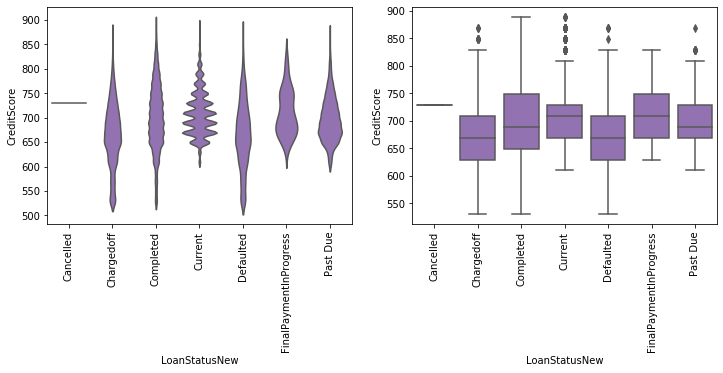

In [166]:
#draw a violin plot and a box plot to see the relationship between these two variables:
plt.figure(figsize=(12,4))
base_color = sb.color_palette()[4]
ax1=plt.subplot(1,2,1)
ax1=sb.violinplot(data = new, 
                  x = 'LoanStatusNew', 
                  y = 'CreditScore', 
                  color = base_color, inner = None)
plt.xticks(rotation=90)
ax2=plt.subplot(1,2,2)
ax1=sb.boxplot(data = new, 
               x = 'LoanStatusNew', 
               y = 'CreditScore', 
               color = base_color)
plt.xticks(rotation=90);

From the above box plot we see that the defaulted and the charged-offs tend to have lower credit score. Taking a closer look at the creditscore for 'current', the violinplot has a very interesting shape. Let's take a closer look at it.

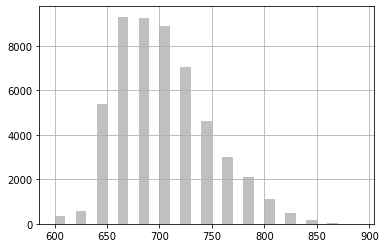

In [167]:
bins=np.arange(600, 900, 10)
new.query('LoanStatusNew == "Current"').CreditScore.hist(bins=bins, color='silver')

This is really interesting, it seems like those whose loans are in progress have rounded credit score. Maybe it is done to protect these borrower's privacy? 

#####  Homeowner & Loan Status

Text(0.5, 1.0, 'Home Owner & Loan Status')

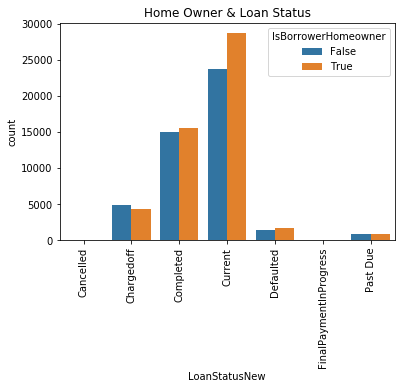

In [168]:
sb.countplot(data = new, x = 'LoanStatusNew', hue = 'IsBorrowerHomeowner')
plt.xticks(rotation=90)
plt.title('Home Owner & Loan Status')

Here we see an interesting pattern, for loan status = current, there tend to be more home owner than non-homeowners. However, for charged-off, defaulted, and past due, we see that the percentage of homeown is almost the same as percent of non-homeowners.

##### Loan Original Amount vs Loan Status

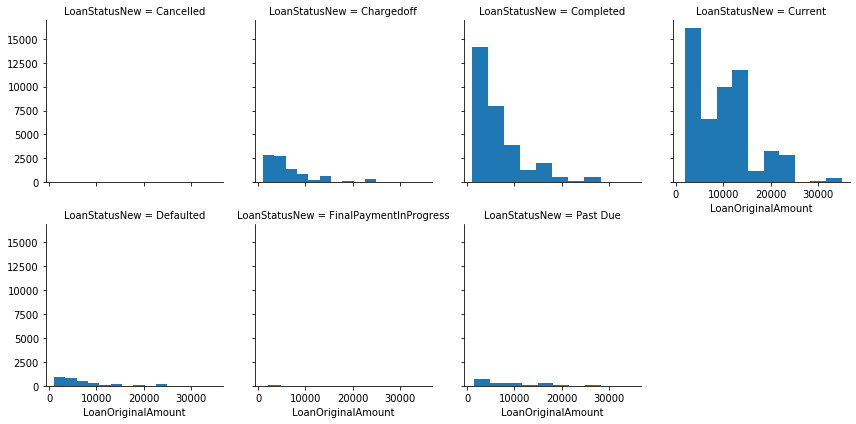

In [169]:
g = sb.FacetGrid(data = new, col = 'LoanStatusNew', col_wrap = 4)
g.map(plt.hist, "LoanOriginalAmount")

Here, we see that when LoanStatusNew=Completed or Current, the distribution of original amount of loan tend to be more right skewed. However, for chargedoff, defaulted and past dues, we tend to see a more uniform distribution of original amount.

### Multivariate Explorations

##### How are available bank credit and homeownership associated with loan status?

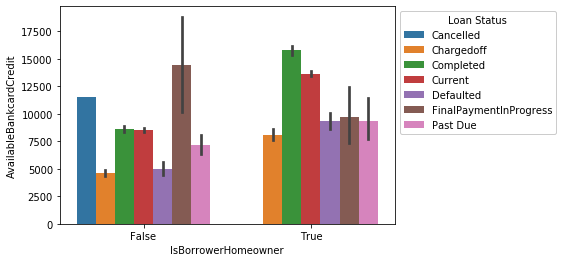

In [170]:
ax = sb.barplot(data = new, x = 'IsBorrowerHomeowner', 
                y = 'AvailableBankcardCredit', 
                hue = 'LoanStatusNew')
ax.legend(bbox_to_anchor=(1,1), framealpha = 1, title = 'Loan Status')

1) For non-homeowners, those who are in the final payment stage have abnormally high available bank card credit, and significantly lower available bank card credit is associated with loans status as defaulted or marked-off.  
2) For homeowners, those whose loans are marked as completed or current have significantly higher available bankcard credit than all the other groups.  

##### How do IncomeRange and Credit Score affect Loan Status?

In [171]:
new.IncomeRange.value_counts()

$25,000-49,999    29820
$50,000-74,999    29340
$100,000+         16063
$75,000-99,999    16010
$1-24,999          5805
Not displayed       114
Not employed         49
Name: IncomeRange, dtype: int64

In [172]:
order = ['Not displayed', 'Not employed', '$1-24,999', '$25,000-49,999', 
         '$50,000-74,999', '$75,000-99,999', '$100,000+']

In [176]:
new.IncomeRange = pd.Categorical(new.IncomeRange, ordered=True, categories=order)

In [177]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97201 entries, 0 to 113936
Data columns (total 16 columns):
ListingKey                  97201 non-null object
ListingNumber               97201 non-null int64
ListingCreationDate         97201 non-null object
LoanStatus                  97201 non-null category
LoanOriginalAmount          97201 non-null int64
MonthlyLoanPayment          97201 non-null float64
IncomeRange                 97201 non-null category
DebtToIncomeRatio           97201 non-null float64
AvailableBankcardCredit     97201 non-null float64
IsBorrowerHomeowner         97201 non-null bool
EmploymentStatus            97201 non-null category
EmploymentStatusDuration    97201 non-null float64
CreditScoreRangeUpper       97201 non-null float64
CreditScoreRangeLower       97201 non-null float64
CreditScore                 97201 non-null float64
LoanStatusNew               97201 non-null category
dtypes: bool(1), category(4), float64(7), int64(2), object(2)
memory usage: 11.

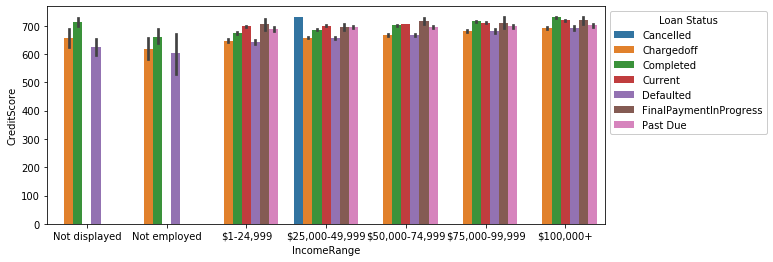

In [183]:
plt.figure(figsize=(10,4))
ax = sb.barplot(data = new, x = 'IncomeRange', y = 'CreditScore', hue = 'LoanStatusNew')
ax.legend(bbox_to_anchor=(1,1), framealpha = 1, title = 'Loan Status');

From the above graph, we see that higher income range is not necessarily associated with significantly higher credit scores or significantly lower defaults/charged-offs. However within each income range, we see that defaulted & charged offs tend to have lower credit score than completed and current. 

##### How do employment status & loan original amount impact loan status?

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


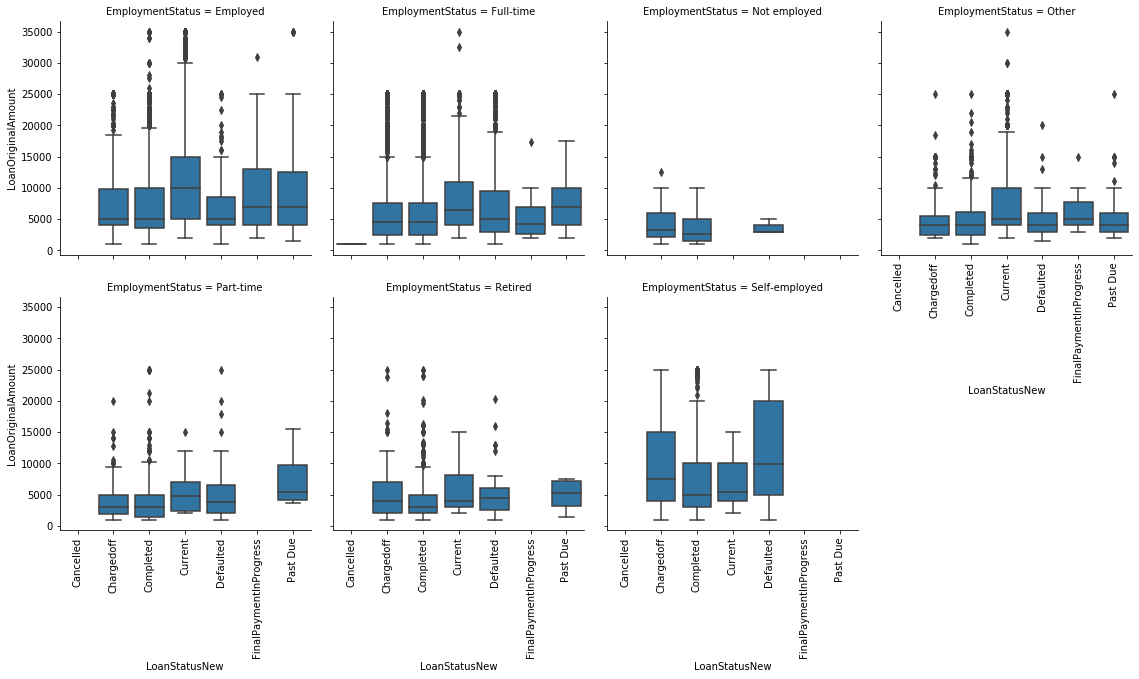

In [394]:
g = sb.FacetGrid(data = new, col = 'EmploymentStatus', height = 4, col_wrap = 4)
g.map(sb.boxplot, 'LoanStatusNew', 'LoanOriginalAmount')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

Some interesting patterns present are:
1. Unemployed borrowers tend to have lower loan original amount, and higher charged off/default proportion.
2. Self-employed borrowers tend to have higher loan original amount, and among them, defaulted tend to be associated with the highest loan amount. (Perhaps it's because startups are hard to maintain..)

## Summary and Limitations

Univariate, bivariate and multivariate exploration were performed to analyze what factors influence loan outcome status. Some of the patterns found are:
1. Defaulted and Charged-Offs tend to be associated with lower credit scores.
2. Defaulted, past-dues, and charged-offs tend to be associated with slightly higher debt-to-income ratio.
3. For non-homeowners, those who are in the final payment stage have abnormally high available bank card credit, and for those who are marked as chargedoff or defaulted, they have significantly lower available bank card credit.  
4. For homeowners, those whose loans are marked as completed or current have significantly higher available bankcard credit than all hte other groups.  
5. Higher income range is not necessarily associated with significantly higher credit scores. However within each income range, we see that defaulted & charged offs tend to have lower credit score than completed and current. 
6. Unemployed borrowers tend to have lower loan original amount, and higher charged off/default proportion.
7. Self-employed borrowers tend to have higher loan original amount, and among them, defaulted tend to be associated with the highest loan amount. (Perhaps it's because startups are hard to maintain..)

Limitations:

Due to the fact that Loan Status is a categorical variable, there are limited ways in which we can explore this variable visually. We will be able to get a much more accurate measurement if we run statistical analysis and regressions on the dataset